<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [62]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [63]:
with open('sat_scores.csv','r') as f:
    rows = [row for row in csv.reader(f)]
    header = rows[0]
    contents = rows[1:]
    
    dict = {}
    
    for i in range(len(header)):
        dict[header[i]] = [(row[i]) if row[i].isdigit() else row[i] for row in contents]

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [64]:
data_from_dict=pd.DataFrame.from_dict(dict)
data=pd.read_csv('sat_scores.csv')
print(data.dtypes)
print(data_from_dict.dtypes)

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object
State     object
Rate      object
Verbal    object
Math      object
dtype: object


In [65]:
#repeat creation of dataframe from dictionary, this time converting string into numerical data where possible
with open('sat_scores.csv','r') as f:
    rows=[row for row in csv.reader(f)]
    header=rows[0]
    data1=rows[1:]
    
dict = {}
    
for i in range(len(header)):
    dict[header[i]] = [float(row[i]) if row[i].isdigit() else row[i] for row in contents]

In [66]:
#Compare every element of both data frames to give matching data frame, list unique values of each column
for column in data.columns:
    print(column, (data_from_dict==data)[column].unique())
#Shows that for each column True is the only unque value i.e. values in dataframes are identical

State [ True]
Rate [False]
Verbal [False]
Math [False]


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [67]:
data.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [68]:
data.shape

(52, 4)

In [69]:
data.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [70]:
type(data[data.columns[1]][0])

numpy.int64

In [71]:
#columns of data dictionary
data_dict_columns =['variable','type of the variable','length','description']

#variables of the data dict are the columns of data frame
data_dict_var = list(data.columns)

#create variable type with the 1st row of each column
data_dict_type = [ type(data[data.columns[col]][0]) for col in range(0, data.shape[1])]

#data dictionary length
data_dict_length = [ len(data) for col in range(0, data.shape[1])]

#writing descriptions for each variable
desc_var_1 = "Name of the state in USA"
desc_var_2 = "SAT rates"
desc_var_3 = "SAT score in verbal"
desc_var_4 = "SAT score in math"
data_dict_desc = [desc_var_1, desc_var_2, desc_var_3, desc_var_4]

#generate list of variables
data_dict_info = [data_dict_var, data_dict_type, data_dict_length, data_dict_desc]

#create data dict in dictionary formattwith dict comrephension and insert with key:value pair
data_dict_table = { data_dict_columns[num] : data_dict_info[num] for num in range(0, len(data_dict_columns))}

#data dictionary with data frame format
data_dict = pd.DataFrame(data_dict_table, index = list(range(1, len(data_dict_var)+1)))
data_dict

,variable,type of the variable,length,description
1,State,<class 'str'>,52,Name of the state in USA
2,Rate,<class 'numpy.int64'>,52,SAT rates
3,Verbal,<class 'numpy.int64'>,52,SAT score in verbal
4,Math,<class 'numpy.int64'>,52,SAT score in math


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [72]:
import seaborn as sns

In [73]:
data

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


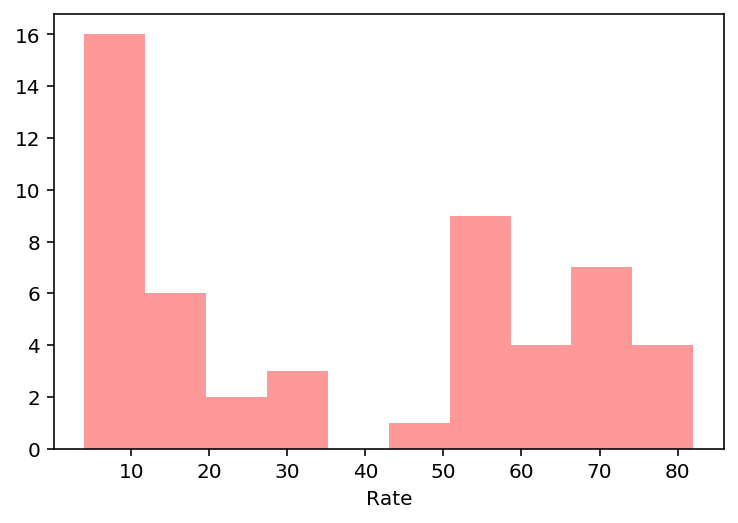

In [74]:
#rate plot,
sns.distplot(data['Rate'], kde = False, bins = 10, color = 'red') 


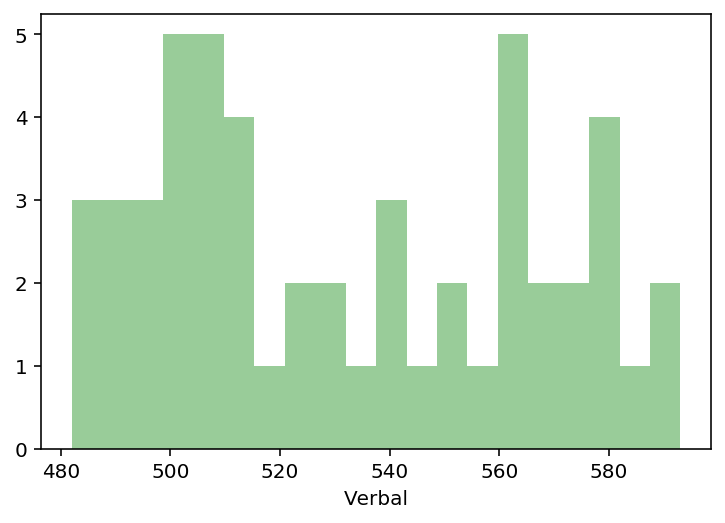

In [75]:
#verbal plot
sns.distplot(data["Verbal"], kde = False, bins = 20, color = 'green')

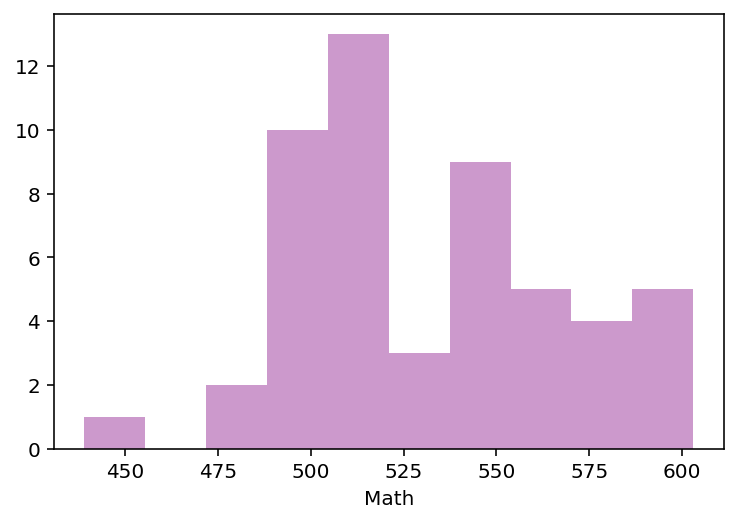

In [76]:
#Math
sns.distplot(data["Math"], kde = False, bins = 10, color = 'purple')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

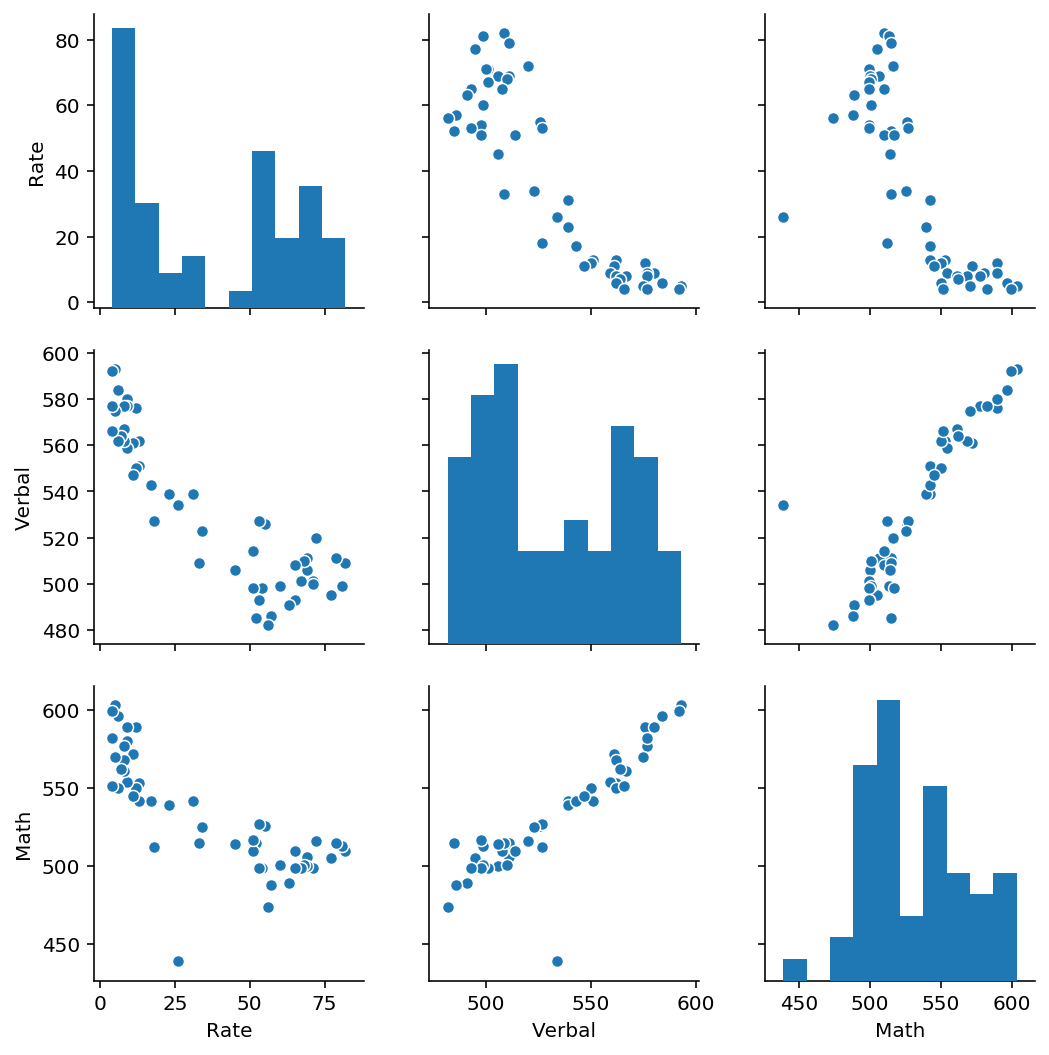

In [77]:
sns.pairplot(data)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

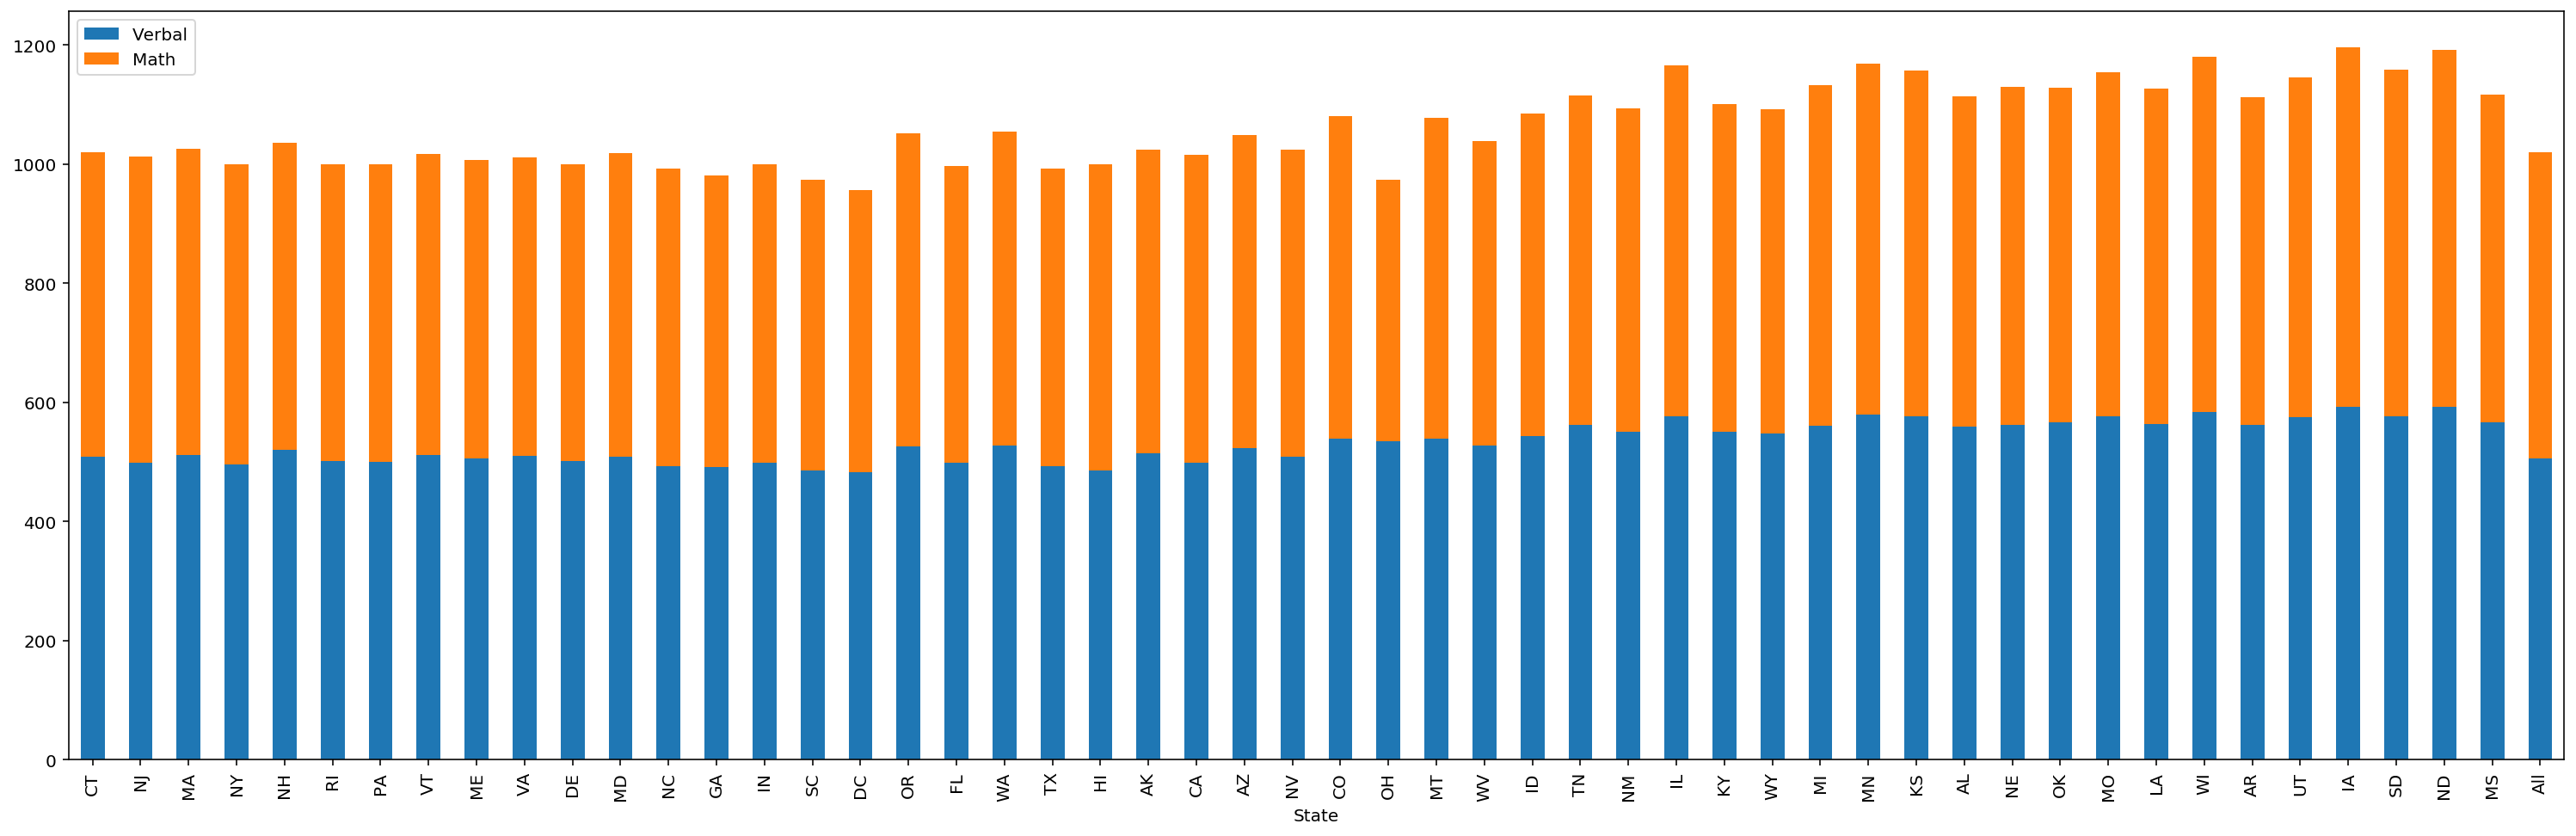

In [78]:
df_hist = data.set_index('State')[['Verbal','Math']]

df_hist.plot.bar(stacked=True, figsize = (26,8))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

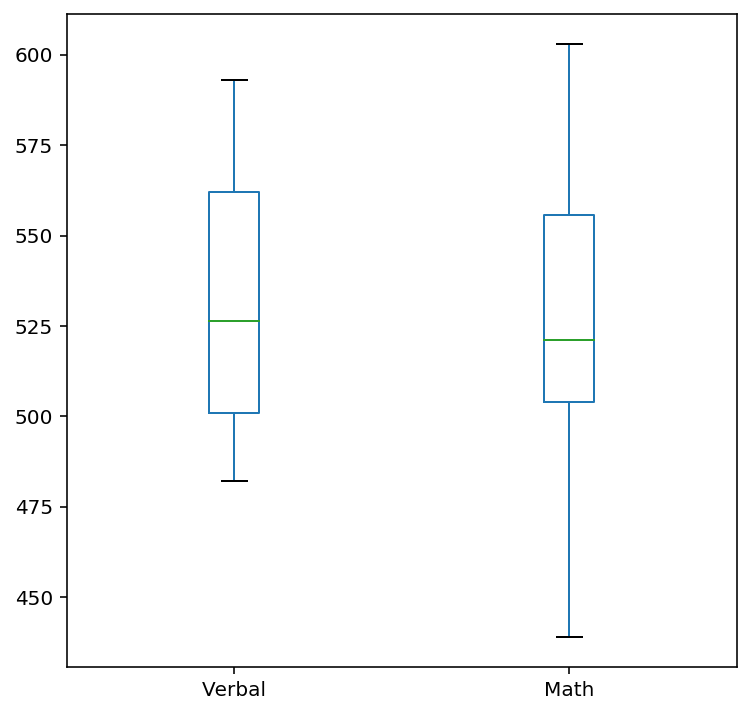

In [79]:
data[['Verbal','Math']].plot.box(figsize = (6,6))

In [80]:
# Histograms cannot give us a good understanding of some concepts such as mean and dispersion. Scatterplots just show us the relation of values of the variables ,but again, are unable to show the how each variable is distributed.

# Since the scale of the values of Rate is much lower than Verbal and Math, the chart containing all three cannot show the values clearly.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Text(0, 0.5, 'Verbal & Math')

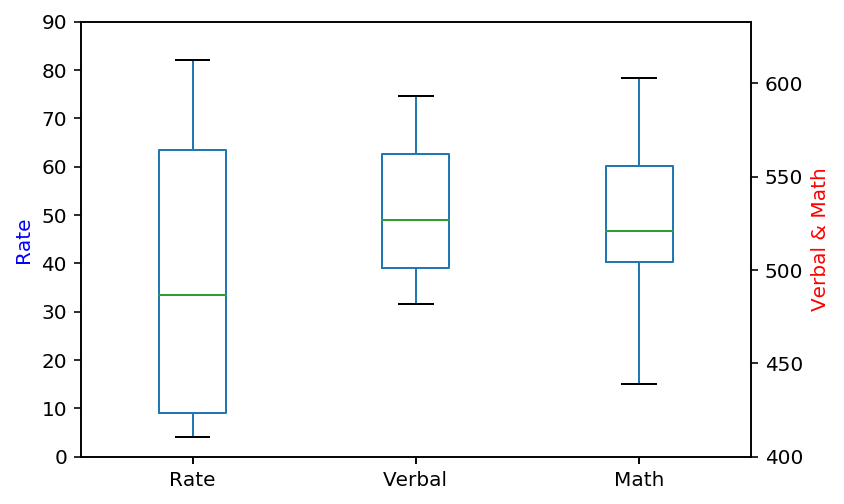

In [81]:
# method 1: generate 2 y lines to present values of rate and verbal & math
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('Rate', color='b')
data.plot.box(ax=ax1)
ax1.set_ylim(bottom = 0, top = 90)

ax2 = ax1.twinx()
data.plot.box(ax=ax2)
ax2.set_ylim(bottom = 400)
ax2.set_ylabel('Verbal & Math', color = 'r')



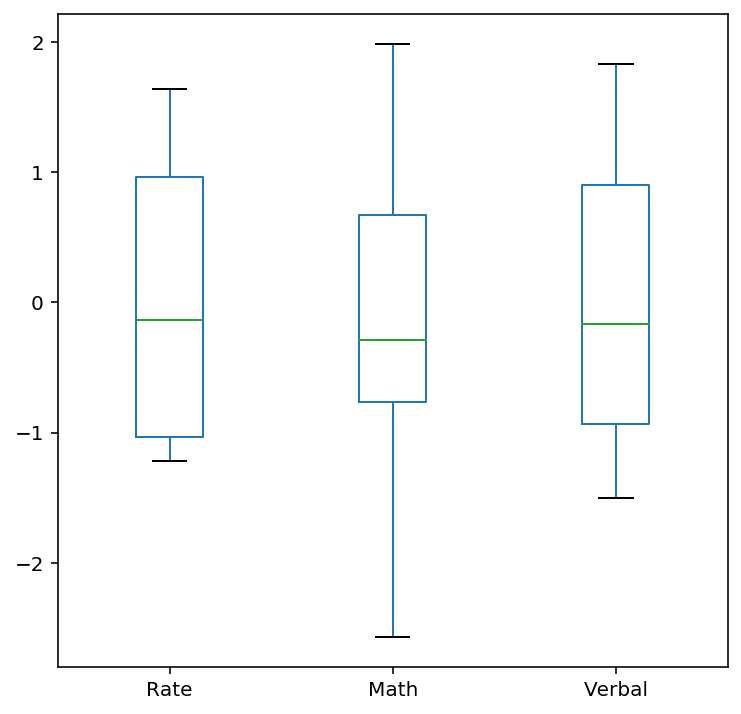

In [82]:
# method 2: standardize the dataframe with (df - df.mean) / df.std
data_3 = data.loc[:,['Rate','Math','Verbal']]
data_3_standard = (data_3 - data_3.mean())/data_3.std()
data_3_standard.plot.box(figsize = (6,6))

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [83]:
states_verbal_greater_than_average = list(data[data['Verbal'] > data['Verbal'].mean()]['State'])
len(states_verbal_greater_than_average)

24

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [84]:
list(data[data['Verbal'] > data['Verbal'].median()]['State'])
len(list(data[data['Verbal'] > data['Verbal'].median()]['State']))

26

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [85]:
data_ver_mat_diff = pd.DataFrame()
data_ver_mat_diff['State'] = data["State"]
data_ver_mat_diff['Verbal - Math'] = data['Verbal'] - data['Math']
data_ver_mat_diff.head()

,State,Verbal - Math
0,CT,-1
1,NJ,-14
2,MA,-4
3,NY,-10
4,NH,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [86]:
data_ver_mat_diff_verb = data_ver_mat_diff.sort_values("Verbal - Math", ascending = False)[0:10]
data_ver_mat_diff_mat = data_ver_mat_diff.sort_values("Verbal - Math", ascending = True)[0:10]

In [87]:
data_ver_mat_diff_verb.head(3)

,State,Verbal - Math
27,OH,95
50,MS,15
29,WV,15


In [88]:
data_ver_mat_diff_mat.head(3)

,State,Verbal - Math
21,HI,-30
23,CA,-19
1,NJ,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [89]:
data[['Rate','Verbal','Math']].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [90]:
data.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [91]:
data[['Rate','Verbal','Math']].cov()


,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [92]:
drug_data = pd.read_csv("drug-use-by-age.csv")

In [93]:
drug_data.head(3)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5


In [94]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [95]:
#create function to replace all cells of '-' with NaN
def data_cleaner(x):
    if x == '-':
        return np.nan
    else:
        return x

# use applymap method to apply the function into dataframe

drug_data = drug_data.applymap(data_cleaner)

In [96]:
#converting every cell into float
def data_type_correct(x):
    if type(x) == str:
        return float(x)
    else:
        return x

In [97]:

drug_data.iloc[:, 2:] = drug_data.iloc[:, 2:].applymap(data_type_correct)

What is the long format version of this dataset?

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [98]:
drug_data

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [99]:
# use iloc to create new dataframe with drug use columns only
drug_use = drug_data.iloc[:, 2::2]
drug_use.head(5)


,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


In [100]:
drug_freq = drug_data.iloc[:,3::2]
drug_freq.head(5)

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,3.0,4.0,5.0,NaN,35.5,52.0,19.0,36.0,24.5,52.0,2.0,NaN,13.0
1,6.0,15.0,1.0,3.0,NaN,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,5.0,24.0,5.5,NaN,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


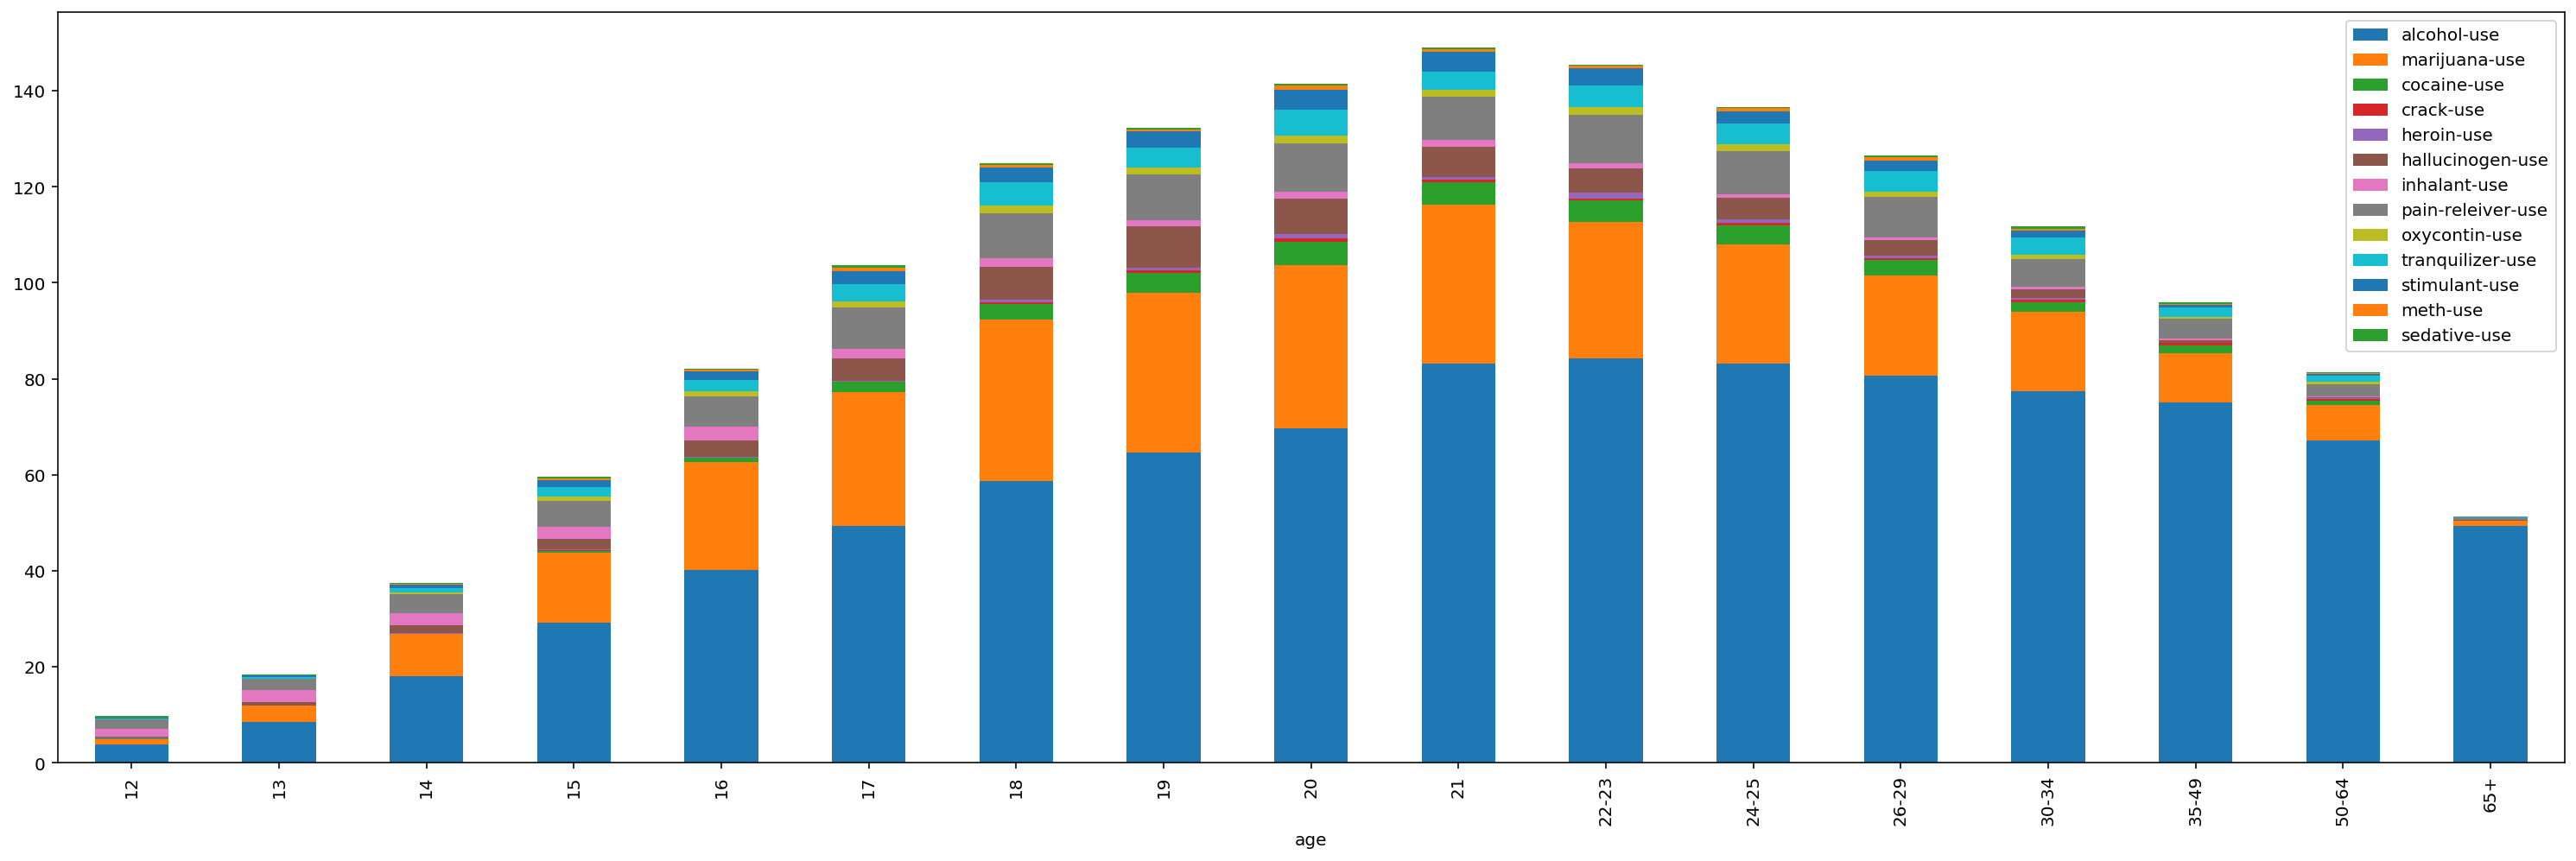

In [101]:
drug_use.set_index(drug_data["age"]).plot.bar(stacked = True, figsize = (26,8))

<BarContainer object of 17 artists>

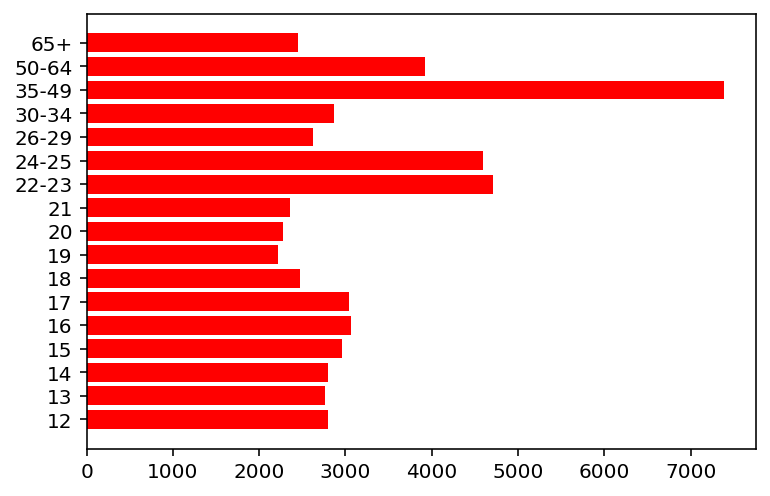

In [102]:
plt.barh(drug_data.age, drug_data.n, color = 'r')

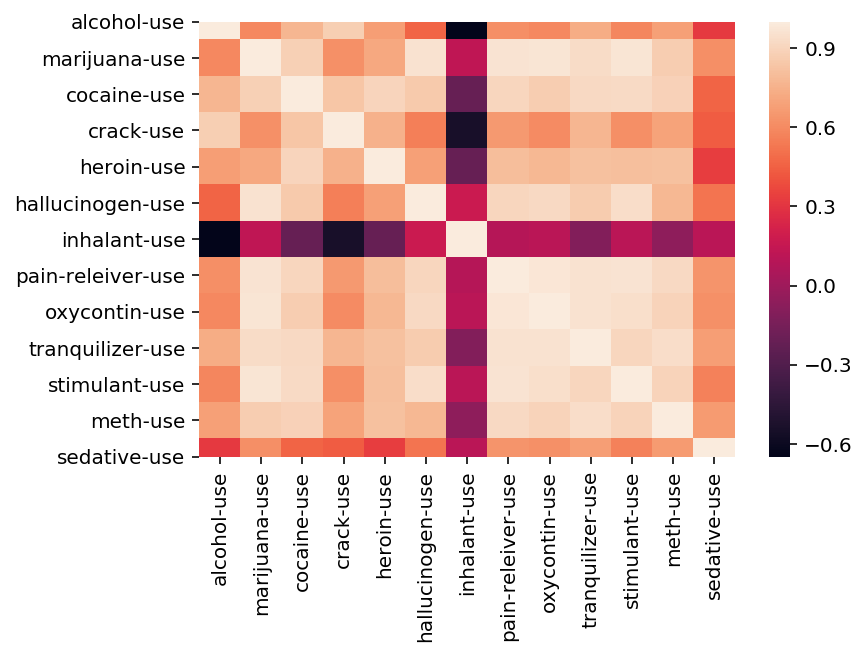

In [103]:
import seaborn as sns
corr_use = drug_use.corr()
sns.heatmap(corr_use)

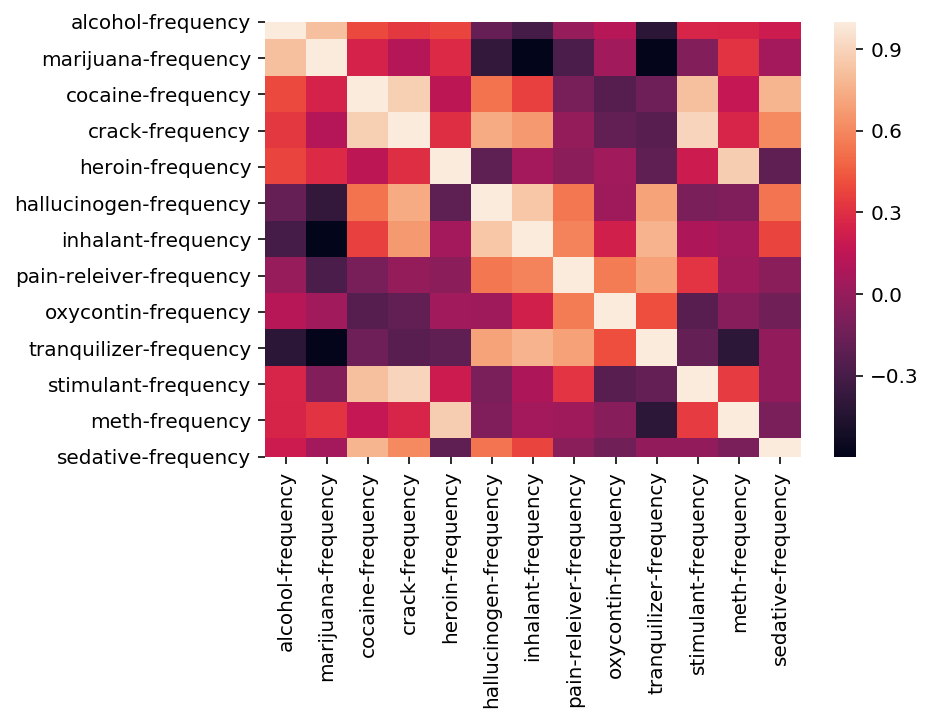

In [104]:
corr_freq = drug_freq.corr()
sns.heatmap(corr_freq)

Insights: 
1. The drug usage by young adults ( from age 20 to 23 ) are higher than other age categories, and alcheol usage accounts the biggest portions of drug use for all of age categories. And the second biggest use seems to be marijuana. 
2. The age category of 35 - 49 has more drug users than other categories.
3. use and frequency of some particular drugs ( e.g: marijuana and cocaine ) have higher correlations index.


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

Question1: if the use frequency of meth and heroin has statistics significance


Null Hypothesis: no difference in the average frequency for Meth and average frequency for Heroin
Alternate Hypothesis: there is a difference

In [105]:
nanmean_meth = np.nanmean(drug_freq['meth-frequency'])
nanmean_meth

35.96666666666667

In [106]:
clean_meth = drug_freq['meth-frequency'].mask(drug_freq['meth-frequency'].isnull(), nanmean_meth)
clean_meth

0      35.966667
1       5.000000
2      24.000000
3      10.500000
4      36.000000
5      48.000000
6      12.000000
7     105.000000
8      12.000000
9       2.000000
10     46.000000
11     21.000000
12     30.000000
13     54.000000
14    104.000000
15     30.000000
16     35.966667
Name: meth-frequency, dtype: float64

In [107]:
nanmean_heroin = np.nanmean(drug_freq['heroin-frequency'])
nanmean_heroin

73.28125

In [108]:
# meth frequency data clean, replace null value with average
clean_heroin = drug_freq['heroin-frequency'].mask(drug_freq['heroin-frequency'].isnull(), nanmean_meth)
clean_heroin

0      35.500000
1      35.966667
2       2.000000
3       1.000000
4      66.500000
5      64.000000
6      46.000000
7     180.000000
8      45.000000
9      30.000000
10     57.500000
11     88.000000
12     50.000000
13     66.000000
14    280.000000
15     41.000000
16    120.000000
Name: heroin-frequency, dtype: float64

In [109]:
mean_diff = np.mean(clean_meth)-np.mean(clean_heroin)
mean_diff

-35.11960784313726

In [110]:
stats.ttest_ind(clean_meth, clean_heroin)

Ttest_indResult(statistic=-1.9381005558779256, pvalue=0.061476473315249136)

**Report**

Since the p value > 0.05, we can conclude that no statistics significance between the mean of using frequency of 2 drug categories. currently we cannot reject the none hyperthesis (H0) based on the test

Question2: Are the alcheol usage rates will be increased with the age increase. Will compare 2 age groups: 26-29, 30-34. To test if the propbability of alcheol are same between these 2 groups.

Test Methods:

We set the 95% confidental interval so that the critical value is 1.96 based on 2 tailed test (47.5% for each side). If the test z-score is higher than 1.96, we will reject the none hyperthesis,

Assumption:
1. 2 independent samples
2. both sample sizes are larger than 30.

Hypotheses:
1. null hypothesis (H0): P1 = P2, p1 is the probability of alcheol users in the age group 26-29, p2 is the probability of alcheol users in age group 30-34
2. Alternative hypothesis: P1 > P2, or P1 < p2, or P1 != P2

Combined Proportion:

P^ = (n1*p1 + n2*p2)/(n1+n2)

Test Statistic:

z = ((p1-p2) / (p^*(1-P^) (1/n1 + 1/n2)) ** 0.5



In [111]:
# coding for hypothesis test

from scipy import stats

# Sample proportion estimates and sample sizes #
p_1=drug_data.iloc[12,2]/100
p_2=drug_data.iloc[13,2]/100
n_1=drug_data.iloc[12,1]
n_2=drug_data.iloc[13,1]

print('Sample proportion for the 26-29 age group is %.2f' % p_1)
print('Sample proportion for the 30-34 age group is %.2f' % p_2)


#combined proportion
p = (p_1*n_1+p_2*n_2)/(n_1+n_2)

# Z-score

z=(p_1-p_2)/(p*(1-p)*(1/n_1+1/n_2))**0.5

# P-value
p_val=1-stats.norm.cdf(z)

print('The Z-score of the test is %.2f and the p-value for the test is %.3f'%(z,p_val))




Sample proportion for the 26-29 age group is 0.81
Sample proportion for the 30-34 age group is 0.78
The Z-score of the test is 2.91 and the p-value for the test is 0.002


Result:

Since the the Z-score is 2.91 which higher than the critical value of 95% confidence interval which is 1.96, we reject the none hyperthesis and we can conclude that the proportion of alcohol users for the 26-29 age group is significantly higher than the 30-34 age group at a 95% confidence level.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [112]:
#use IQR
rate = data['Rate']
rate_list = list(rate)

#define the IQR(interquartile range)
q1,q3=np.percentile(rate,[25,75])
IQR = q3-q1
lower_bound = q1-(1.5 * IQR)
upper_bound = q3+(1.5 * IQR)
print('the lower bound is {0} and the upper bound is {1}, so anything outside of {0} and {1} is an outlier.' .format(lower_bound,upper_bound))

outlier_list = []
for x in rate:
    if x > upper_bound or x < lower_bound:
        outlier_list.append(outlier)

outlier_list
        
    

the lower bound is -72.75 and the upper bound is 145.25, so anything outside of -72.75 and 145.25 is an outlier.


[]

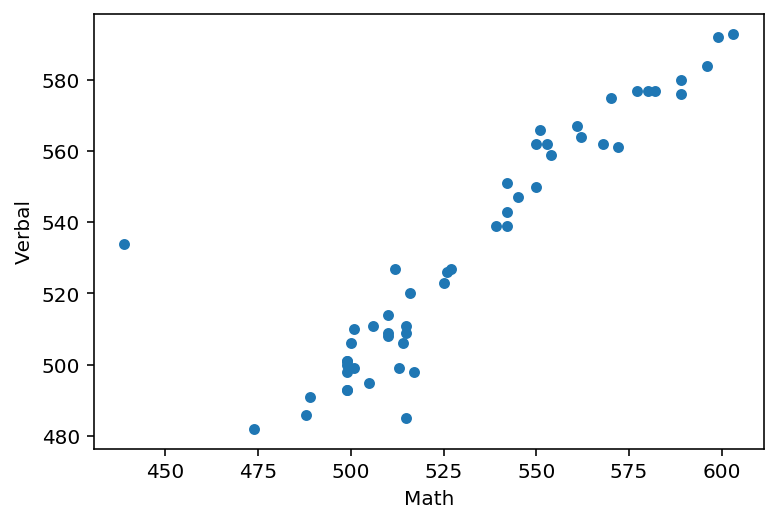

In [113]:
data[['Math','Verbal']].plot(kind = 'scatter', x = 'Math', y = 'Verbal')

According to above methods (1.5 times IQR and 3 times std), there is no outlier value exists in rate column.

In [114]:
#use standard deviation, set 3 standard deviation
import numpy as np
import statistics as stat


anomalies = []

def find_anomalies(data):
    # Set upper and lower limit to 3 standard deviation
    data_std = stat.stdev(data)
    data_mean = stat.mean(data)
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit, upper_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(rate)

-44.75151806476169 119.059210372454


[]

In [115]:
#use standard deviation, set 1.5 standard deviation
upper=rate.mean()+1.5*rate.std()
lower=rate.mean()-1.5*rate.std()
outly=rate.between(lower,upper)

# Print the outliers # 
data[-outly]


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515


In [116]:
# Mean, Median, Standard Deviation without outliers # 

print('Sample Means:')
print(round(data[outly].mean(),2))
print('Sample Medians:')
print(round(data[outly].median(),2))
print('Sample Standard Deviations:')
print(round(data[outly].std(),2))

Sample Means:
Rate       34.49
Verbal    533.59
Math      532.65
dtype: float64
Sample Medians:
Rate       31.0
Verbal    527.0
Math      526.0
dtype: float64
Sample Standard Deviations:
Rate      25.81
Verbal    33.59
Math      36.80
dtype: float64


In [117]:
# Mean, Median, Standard Deviation with outliers # 

print('Sample Means:')
print(round(data.mean(),2))
print('Sample Medians:')
print(round(data.median(),2))
print('Sample Standard Deviations:')
print(round(data.std(),2))


Sample Means:
Rate       37.15
Verbal    532.02
Math      531.50
dtype: float64
Sample Medians:
Rate       33.5
Verbal    526.5
Math      521.0
dtype: float64
Sample Standard Deviations:
Rate      27.30
Verbal    33.24
Math      36.01
dtype: float64


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [118]:
verbal = data['Verbal']
verbal_list = list(verbal)

math = data['Math']
math_list = list(math)

spearman_coef = stats.spearmanr(verbal_list, math_list)
pearson_coef =stats.pearsonr(verbal_list, math_list)

print('The coefficient and p_value for Verbal and Math Score with Spearman corrleation are: ', spearman_coef)
print('The coefficient and p_value for Verbal and Math Score with Pearson corrleation are: ', pearson_coef)

The coefficient and p_value for Verbal and Math Score with Spearman corrleation are:  SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)
The coefficient and p_value for Verbal and Math Score with Pearson corrleation are:  (0.899870852544429, 1.1920026733067636e-19)


In [120]:
data[['Verbal','Math']].corr()


,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


    1. Spearman corrleation is the non-parametric version of the pearson corrleation. And data must be ranked or scored. Speaerman value range from -1 to 1

2. image we have 2 lists of data, 1 for students results for verbal and another for Math.
   step 1: find ranks for scores each column, and add a column to calculate the    difference of the ranks for each State between 2 subjects (name difference      as d) and then square the d.
   step 2: sum up all d-square values. 
   step 3: use formula to calculate the corrleation co-efficient:
   
   1 - ((6 * sum(d ** 2))/n*(n ** 2-1))



### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [ ]:
rate_percentile = [stats.percentileofscore(data['Rate'], a) for a in data['Rate']] 
data['rate_percentile'] = rate_percentile
data[['State','rate_percentile']].loc[data['State'] == 'CA']

In [ ]:
rate_ranked = stats.rankdata(data['Rate'])
rate_ranked

In [ ]:
perc_vs_spearman_coeff = pd.DataFrame([list(data.State), rate_percentile, rate_ranked],
                                index = ["States", "Rate_percentiles", "Rate_ranked"]).T
perc_vs_spearman_coeff.head(10)

Accrding to above dataFrame, rate_percentiles is a kind of raw score of ranking. If a state has rate_percentiles is Si, it means its rate_percentiles is greater than si percentage of other states. The rate_percentiles has strong positive correlation with Rate ranked

In [ ]:
rate_per = perc_vs_spearman_coeff['Rate_percentiles']
list_rate_per = list(rate_per)
rate_rank = perc_vs_spearman_coeff['Rate_ranked']
list_rate_rank = list(rate_rank)
stats.pearsonr(list_rate_per, list_rate_rank)

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

1. The percentile is a raw score of the ranking of variable, we can easily to identify the lowest and highest value of a column with percentile. 

In [ ]:
#2.
plt.hist(drug_data['alcohol-use'], color = 'b', bins = 10)


In [ ]:
#3.
alcohol_percentile = [stats.percentileofscore(drug_data['alcohol-use'], a) for a in drug_data['alcohol-use']]
plt.hist(alcohol_percentile, color = 'b', bins = 10)